In [3]:
%pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
print(pd.__version__)



3.0.0


In [5]:
import pandas as pd
import glob
import os


In [6]:
# Path to GitHub city-wise AQI datasets
city_data_path = "../data/github/"

# Automatically read all city CSV files
city_files = glob.glob(os.path.join(city_data_path, "*_AQI_Dataset.csv"))

city_dfs = []

for file in city_files:
    df = pd.read_csv(file)
    city_dfs.append(df)

city_aqi = pd.concat(city_dfs, ignore_index=True)

city_aqi.head()


,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Bangalore,01/01/18,68.0,37.4,73.44,56.44,77.52,0.71,64.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bangalore,02/01/18,76.0,41.8,82.08,63.08,86.64,0.80,72.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangalore,03/01/18,70.0,38.5,75.60,58.10,79.80,0.74,66.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bangalore,04/01/18,78.0,42.9,84.24,64.74,88.92,0.82,74.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bangalore,05/01/18,82.0,45.1,88.56,68.06,93.48,0.86,77.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
city_aqi['Date'] = pd.to_datetime(city_aqi['Date'], dayfirst=True)


C:\Users\Premalatha N K\AppData\Local\Temp\ipykernel_25000\1620661611.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  city_aqi['Date'] = pd.to_datetime(city_aqi['Date'], dayfirst=True)


In [8]:
%pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
mendeley = pd.read_excel("../data/mendeley/aqi_india_mendeley.xlsx")
mendeley.head()

,City,AQI,PM2.5,PM10,O3,NO2,SO2,CO,Latitude,Longitude,Time
0,"Gulzarpet, Anantapur, India",86,86.0,18.0,24.8,1.8,2.2,4.9,14.675886,77.593027,2024-04-24 18:00:00
1,"Anand Kala Kshetram, Rajamahendravaram, India",62,62.0,53.0,9.7,5.9,4.6,5.7,16.987287,81.736318,2024-04-24 18:00:00
2,"Tirumala-APPCB, Tirupati, India",93,93.0,59.0,24.6,11.6,1.9,7.7,13.670000,79.350000,2024-04-24 18:00:00
3,"PWD Grounds, Vijayawada, India",-,52.0,NaN,5.1,0.7,4.9,4.2,16.507014,80.627767,2020-11-19 16:00:00
4,"Naharlagun, Naharlagun, India",65,65.0,28.0,1.0,1.1,1.6,2.3,27.103358,93.679645,2024-04-24 18:00:00


In [10]:
# Rename columns for consistency
city_aqi.rename(columns={'PM2.5': 'PM2_5'}, inplace=True)

mendeley.rename(columns={
    'PM2.5': 'PM2_5',
    'Time': 'Date'
}, inplace=True)


In [11]:
mendeley['Date'] = pd.to_datetime(mendeley['Date'])


In [12]:
mendeley = mendeley[['City', 'Date', 'Latitude', 'Longitude']]
mendeley.head()


,City,Date,Latitude,Longitude
0,"Gulzarpet, Anantapur, India",2024-04-24 18:00:00,14.675886,77.593027
1,"Anand Kala Kshetram, Rajamahendravaram, India",2024-04-24 18:00:00,16.987287,81.736318
2,"Tirumala-APPCB, Tirupati, India",2024-04-24 18:00:00,13.670000,79.350000
3,"PWD Grounds, Vijayawada, India",2020-11-19 16:00:00,16.507014,80.627767
4,"Naharlagun, Naharlagun, India",2024-04-24 18:00:00,27.103358,93.679645


In [13]:
merged_df = pd.merge(
    city_aqi,
    mendeley,
    on=['City', 'Date'],
    how='left'
)

merged_df.head()


,City,Date,AQI,PM2_5,PM10,NO2,SO2,CO,O3,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Latitude,Longitude
0,Bangalore,2018-01-01,68.0,37.4,73.44,56.44,77.52,0.71,64.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bangalore,2018-01-02,76.0,41.8,82.08,63.08,86.64,0.80,72.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangalore,2018-01-03,70.0,38.5,75.60,58.10,79.80,0.74,66.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bangalore,2018-01-04,78.0,42.9,84.24,64.74,88.92,0.82,74.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bangalore,2018-01-05,82.0,45.1,88.56,68.06,93.48,0.86,77.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
output_path = "../data/merged_output/merged_aqi_india.csv"
merged_df.to_csv(output_path, index=False)

print("Merged dataset saved to:", output_path)


Merged dataset saved to: ../data/merged_output/merged_aqi_india.csv


In [15]:
merged_df = pd.read_csv("../data/merged_output/merged_aqi_india.csv")
merged_df.head()


,City,Date,AQI,PM2_5,PM10,NO2,SO2,CO,O3,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Latitude,Longitude
0,Bangalore,2018-01-01,68.0,37.4,73.44,56.44,77.52,0.71,64.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bangalore,2018-01-02,76.0,41.8,82.08,63.08,86.64,0.80,72.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangalore,2018-01-03,70.0,38.5,75.60,58.10,79.80,0.74,66.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bangalore,2018-01-04,78.0,42.9,84.24,64.74,88.92,0.82,74.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bangalore,2018-01-05,82.0,45.1,88.56,68.06,93.48,0.86,77.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Remove all unnamed columns
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains("^Unnamed")]


In [17]:
merged_df.head()


,City,Date,AQI,PM2_5,PM10,NO2,SO2,CO,O3,Latitude,Longitude
0,Bangalore,2018-01-01,68.0,37.4,73.44,56.44,77.52,0.71,64.6,NaN,NaN
1,Bangalore,2018-01-02,76.0,41.8,82.08,63.08,86.64,0.80,72.2,NaN,NaN
2,Bangalore,2018-01-03,70.0,38.5,75.60,58.10,79.80,0.74,66.5,NaN,NaN
3,Bangalore,2018-01-04,78.0,42.9,84.24,64.74,88.92,0.82,74.1,NaN,NaN
4,Bangalore,2018-01-05,82.0,45.1,88.56,68.06,93.48,0.86,77.9,NaN,NaN


In [18]:
pollutants = ['PM2_5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

merged_df[pollutants] = merged_df.groupby('City')[pollutants].transform(
    lambda x: x.fillna(x.mean())
)


In [19]:
merged_df[pollutants].isna().sum()


PM2_5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
dtype: int64

In [20]:
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [22]:
features = ['PM2_5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
target = 'AQI'

X = merged_df[features]
y = merged_df[target]


In [ ]:
def health_risk(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

merged_df["Health_Risk"] = merged_df["AQI"].apply(health_risk)
merged_df[['AQI', 'Health_Risk']].head()


,AQI,Health_Risk
0,68.0,Satisfactory
1,76.0,Satisfactory
2,70.0,Satisfactory
3,78.0,Satisfactory
4,82.0,Satisfactory


In [24]:
# Fill missing pollution values with city-wise mean
pollutants = ['PM2_5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

merged_df[pollutants] = merged_df.groupby('City')[pollutants].transform(
    lambda x: x.fillna(x.mean())
)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [27]:
merged_df['AQI'].isna().sum()


np.int64(1)

In [28]:
merged_df = merged_df.dropna(subset=['AQI'])


In [29]:
merged_df['AQI'].isna().sum()


np.int64(0)

In [30]:
y_train.isna().sum()


np.int64(1)

In [31]:
y_train[y_train.isna()]


3086   NaN
Name: AQI, dtype: float64

In [32]:
# Combine X_train and y_train temporarily
train_df = X_train.copy()
train_df['AQI'] = y_train

# Drop rows where AQI is NaN
train_df = train_df.dropna(subset=['AQI'])

# Split back
X_train = train_df[features]
y_train = train_df['AQI']


In [33]:
y_train.isna().sum()


np.int64(0)

In [40]:
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [36]:
y_train.isna().sum()


np.int64(0)

In [37]:
merged_df = merged_df.dropna(subset=['AQI'])


In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")


MAE  : 0.02
RMSE : 0.40
R²   : 1.000


In [42]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
4,CO,0.184440
0,PM2_5,0.178968
5,O3,0.177980
3,SO2,0.160383
1,PM10,0.159583
2,NO2,0.138646


In [43]:
city_importance = merged_df.groupby('City')[features].mean()
city_importance


,PM2_5,PM10,NO2,SO2,CO,O3
City,,,,,,
Bangalore,40.876878,80.267324,61.686925,84.726620,0.780712,70.605516
Chennai,42.535059,83.523388,64.189271,88.163576,0.812278,73.469647
Delhi,114.557143,224.948571,172.877143,237.445714,2.187307,197.871429
Hyderabad,46.970775,92.233521,70.883169,97.357606,0.897093,81.131338
Mumbai,58.730347,115.325046,88.629433,121.731993,1.121586,101.443327


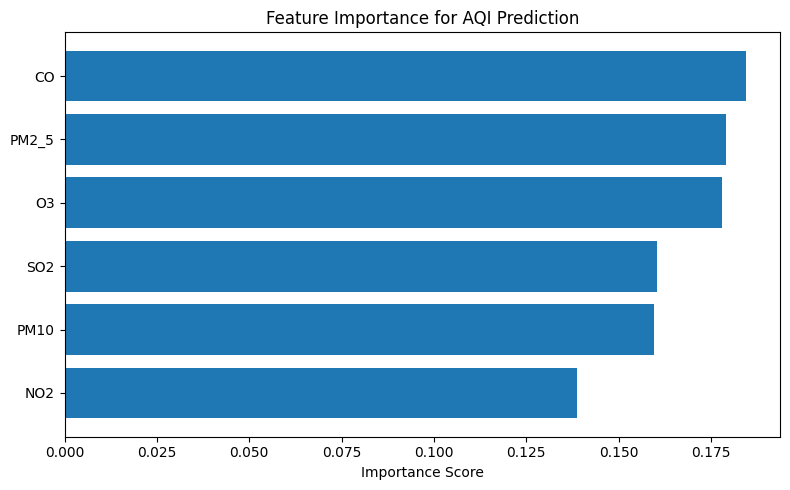

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature Importance for AQI Prediction")

plt.tight_layout()
plt.savefig("../data/merged_output/feature_importance.png")
plt.show()



In [45]:
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
%pip install joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import joblib
joblib.dump(model, "../data/merged_output/aqi_random_forest_model.pkl")


['../data/merged_output/aqi_random_forest_model.pkl']

In [48]:
def predict_aqi(pm25, pm10, no2, so2, co, o3):
    input_data = [[pm25, pm10, no2, so2, co, o3]]
    return model.predict(input_data)[0]


In [52]:
predicted_aqi = predict_aqi(42, 88, 60, 14, 0.9, 35)
category = health_risk(predicted_aqi)

print("Predicted AQI:", predicted_aqi)
print("Air Quality Level:", category)


Predicted AQI: 67.915
Air Quality Level: Satisfactory


C:\Users\Premalatha N K\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
